In [1]:
import os

class_names = ['limestone',
 'marl_limestone',
 'marl_marlstone',
 'salt',
 'sand',
 'sand_clay',
 'silt']

DATADIR  = "motifs_7_classes/"
TRAINDIR = os.path.join(DATADIR, "train")

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest")


train_generator_augmented = train_datagen.flow_from_directory(
    TRAINDIR, 
    target_size=(100, 100),
    batch_size=10,
    classes=class_names,
    class_mode="categorical"
)

print("\nNombre de données d'entraînement: ", train_generator_augmented.n)

for train_batch, train_labels_batch in train_generator_augmented:
    print("\nTaille des batchs de données d'entraînement :", train_batch.shape)
    print("Taille des batch des labels d'entraînement:", train_labels_batch.shape)
    break

Found 85 images belonging to 7 classes.

Nombre de données d'entraînement:  85

Taille des batchs de données d'entraînement : (10, 100, 100, 3)
Taille des batch des labels d'entraînement: (10, 7)


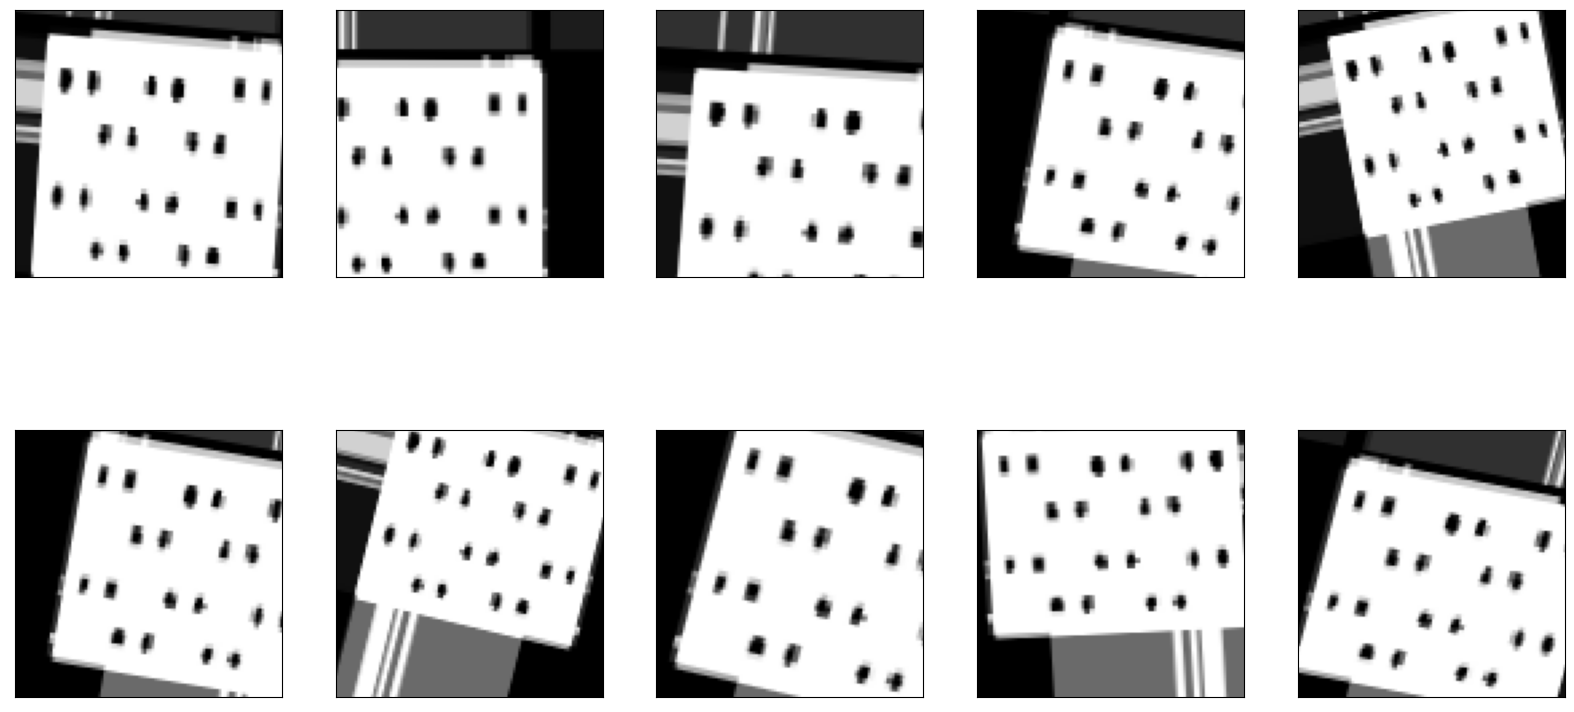

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
img = image_proccessed = tf.keras.preprocessing.image.load_img('motifs_7_classes/train/silt/silt.png', target_size=(100, 100))
x = tf.keras.preprocessing.image.img_to_array(img)  # this is a Numpy array with shape (3, 100, 100)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 100, 100)

#image_proccessed = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))


# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
# visualisation des images générés par ImageDataGenerator avec leur label
plt.figure(figsize=(20,10))
for batch in train_datagen.flow(x, batch_size=1,
                          save_to_dir='data_augmentees/', save_prefix='motif', save_format='jpeg'):
    if i > 9:
        break  # otherwise the generator would loop indefinitely
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(batch[0], cmap=plt.cm.binary)
    i += 1
